This is meant to analyse the statistics of a youtube channel to draw specific insights about it.

In [1]:
from youtube_api import YoutubeAPI
from modules.async_functions import aget_video_stats

In [2]:
api = YoutubeAPI(video_url="https://www.youtube.com/watch?v=FkREhcew93k")

In [3]:
api.get_uploads_playlist_id()
api.get_video_ids_from_playlist()

['FkREhcew93k',
 'eVfpxTnDkYI',
 'SVFGzlElC8w',
 '6VJ30VMoyNs',
 'IJ8b0j_ZTok',
 'uCAMiFcsvEU',
 '1MHSGivAJvI',
 '2LiTewGxvr0',
 'j64acCeati4',
 'yoyhwPCq5Fg',
 'uTA3DOL8AfE',
 '9rJO3vptblU',
 '5ycev3hrR-U',
 'MykDCoBujuU',
 'YjRP7USZBqI',
 'SXCfxZ7U-Cw',
 'KmhJ-VTViss',
 'FpZBGp5j-Ek',
 '7FiHlCMt1Ws',
 '0UItQIgz4w8',
 'Exm6m2Z9sSU',
 '0gH-hSyWp9o',
 'XfJmAubmB9g',
 'LCb7cy8U0Vo',
 '2XOuAz5uH_Y',
 'KjNqRQe1QFw',
 'L5chAHDItx8',
 'QgWGT-Hxpss',
 'jgR5c6CcB_w',
 'KOstiHw4LTY',
 'u1Odq3s5tkw',
 'QJ7zvGV8tbY',
 'oGPhUurk3yE',
 'xhNJfL9L_sg',
 'dBslxTNE9cs',
 'atg2ufpsst8',
 'Y4WyLc-IvRw',
 'QddjMBzyJUQ',
 'Hqs24Gm0y_g',
 'fgocUgMCPbg',
 'mDhTq8_EHhs',
 'a_1cV7hg5G8',
 'IK1JQkBsLfE',
 'WNxd2T10f1Y',
 'dzVDyswpJCc',
 '7W8p-X09a7U',
 'NtRkPxDtOwo',
 'W3o4tddLB3I',
 'JS8KLXpVyZU',
 'JjcmHrF3yFI',
 'dTgvHYxpc2Y',
 'fyB04WgQYnc',
 'HCZyxCCyMLc',
 'kpxJXtgws1Q',
 'qTg5IzS6PWY',
 'suCdwBx7N-s',
 'u4ryZ3oPCJY',
 'S9Do2p4PwtE',
 'wRtKpfKwjKY',
 'LaL8TQ-PzYs',
 'nrUboBuGaWo',
 'sAzRc78TK0M',
 'QAAIKL

In [4]:
data = await aget_video_stats(api.video_ids)

In [5]:
import json

with open("data/data.jsonl", "w", encoding="utf-8") as fp:
    for record in data:
        json.dump(record, fp)
        fp.write("\n")

### Exploratory Analysis

In [6]:
import pandas as pd

In [7]:
# import json

# with open("data/data.jsonl", encoding="utf-8") as fp:
#     data = [json.loads(record) for record in fp]

In [8]:
df = pd.DataFrame(data)

In [9]:
df.head(2)

,videoId,viewCount,likeCount,commentCount,duration,videoTitle,publishedAt
0,FkREhcew93k,3282,433,57,PT12M52S,E is for EFF,2024-10-21T17:18:07Z
1,eVfpxTnDkYI,6512,716,172,PT16M9S,D is for DOS,2024-10-14T14:00:40Z


In [10]:
df.dtypes

videoId         object
viewCount       object
likeCount       object
commentCount    object
duration        object
videoTitle      object
publishedAt     object
dtype: object

In [11]:
df['publishedAt'] = pd.to_datetime(df.publishedAt)
df['viewCount'] = pd.to_numeric(df.viewCount)
df['likeCount'] = pd.to_numeric(df.likeCount)
df['commentCount'] = pd.to_numeric(df.commentCount)

In [12]:
df.dtypes

videoId                      object
viewCount                     int64
likeCount                     int64
commentCount                  int64
duration                     object
videoTitle                   object
publishedAt     datetime64[ns, UTC]
dtype: object

### Visualization

#### Seaborn

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.set_index('publishedAt', inplace=True)

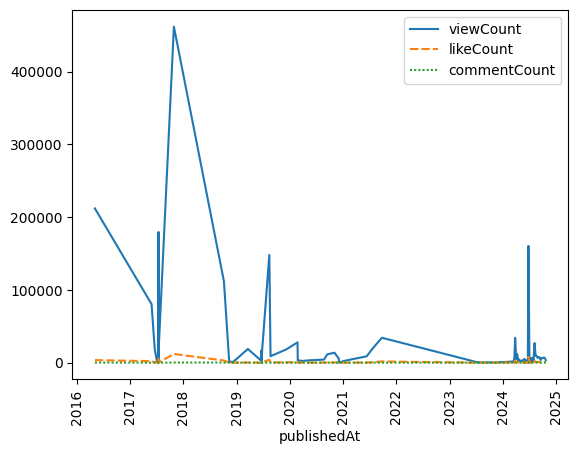

In [15]:
fig, ax = plt.subplots()
sns.lineplot(data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

#### Plotly

In [16]:
import plotly.graph_objects as go

In [17]:
df.head(1)

,videoId,viewCount,likeCount,commentCount,duration,videoTitle
publishedAt,,,,,,
2024-10-21 17:18:07+00:00,FkREhcew93k,3282,433,57,PT12M52S,E is for EFF


In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['viewCount'],
                         mode="lines+markers",
                         name="viewCount",
                         customdata=df[['videoTitle', 'videoId']],
                         hovertemplate=
                        '<b>publishedAt</b>: %{x}<br>' +
                        '<b>viewCount</b>: %{y:.2f}<br>' +
                        '<b>videoTitle</b>: %{customdata[0]}<br>' +
                        '<b>videoId</b>: %{customdata[1]}' +
                        '<extra></extra>',))
fig.add_trace(go.Scatter(x=df.index, y=df['likeCount'],
                             mode="lines",
                             name="likeCount"))
fig.add_trace(go.Scatter(x=df.index, y=df['commentCount'],
                         mode="lines",
                         name="commentCount"))
